In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

## Wine data

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [5]:
# Data set 나누기 90(80:10):10
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.1,random_state=100)
x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x_train, y_train, test_size = 1/9,random_state=100)
#x label 의 data들을 정규화한다. (knn,svm 활용시 필요)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#validation set으로 테스트 하는 경우
scaler.fit(x_train_temp)
x_valid1 = scaler.transform(x_valid)
x_train_temp1 = scaler.transform(x_train_temp)
#test set으로 test 하는 경우
scaler.fit(x_train)
x_train1 = scaler.transform(x_train)
x_test1=scaler.transform(x_test)

# #[1] 수업시간에 배운 알고리즘들의 파라미터를 최적화

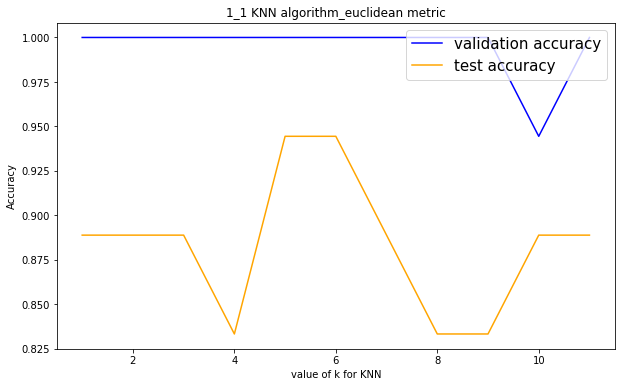

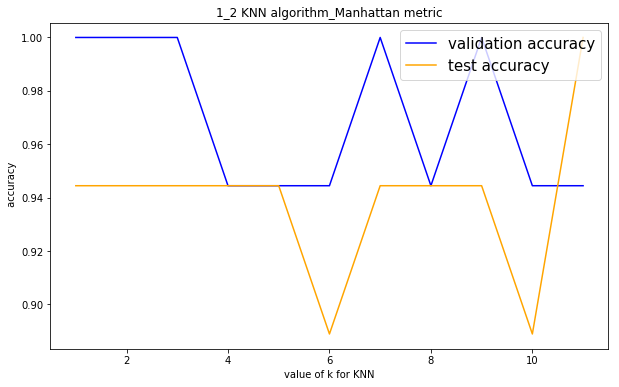

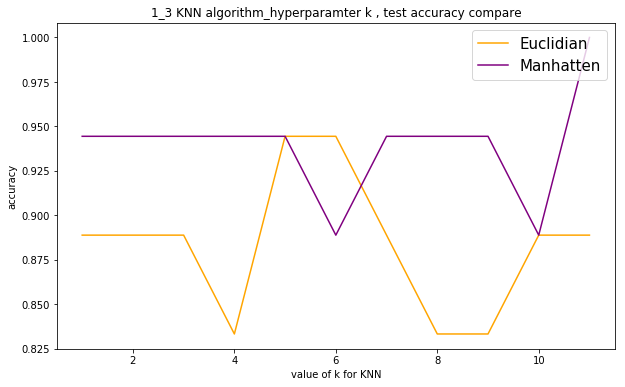

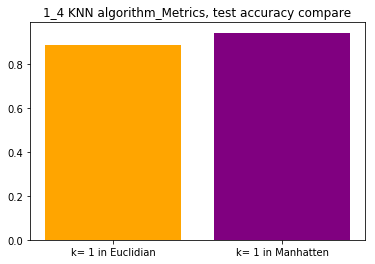

validation set으로 test 한 경우
Euclidian 으로 거리를 잰 경우의 최적의 k값 :1
Manhattan 으로 거리를 잰 경우의 최적의 k값 :1
validation set에서 찾은 최적의 k값으로 훈련시킨 모델의 test accuracy
Euclidian 으로 거리를 잰 경우의 test accuracy :0.8888888888888888
Manhattan 으로 거리를 잰 경우의 test accuracy :0.9444444444444444
test set으로 test 한 경우
Euclidian 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :5
Manhattan 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :11


In [6]:
#1. Knn 
# mettric 들 중 최소 두 개 비교
#이웃의 개수 k를 최소 3개 비교
#x는 표준화한것 이용
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#training
hyperparameter_K = range(1,12)
scores_valid_knnA = []
scores_test_knnA = []

scores_valid_knnB = []
scores_test_knnB = []


#training set(80%)을 가지고 validation set로 테스트 하여 validation accuracy 도출
for k in hyperparameter_K:
    #Euclidean
    knn = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski',n_jobs=-1)
    knn.fit(x_train_temp1,y_train_temp)
    y_pred = knn.predict(x_valid1)
    scores_valid_knnA.append(knn.score(x_valid1,y_valid))
    
    #Manhattan
    knn = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski',n_jobs=-1)
    knn.fit(x_train_temp1,y_train_temp)
    y_pred = knn.predict(x_valid1)
    scores_valid_knnB.append(knn.score(x_valid1,y_valid))
    
#최적화된 k값 저장 (k는 1부터 시작하므로 +1을 해준다.)
maxEuc = scores_valid_knnA.index(max(scores_valid_knnA))+1
maxMan = scores_valid_knnB.index(max(scores_valid_knnB))+1


#전체 training set를 가지고 test set을 테스트하여 test accuracy 도출
for k in hyperparameter_K:
    #Euclidean    
    knn = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski',n_jobs=-1)
    knn.fit(x_train1,y_train)
    scores_test_knnA.append(knn.score(x_test1,y_test))
    
    #Manhattan 
    knn = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski',n_jobs=-1)
    knn.fit(x_train1,y_train)
    scores_test_knnB.append(knn.score(x_test1,y_test))
    
    
#test set을 훈련시킨 k값들 중 가장 높은 test acc가진 k저장 (k는 1부터 시작하므로 +1을 해준다.)->나중에 그냥 보여주기용
maxEuc_test = scores_test_knnA.index(max(scores_test_knnA))+1 
maxMan_test = scores_test_knnB.index(max(scores_test_knnB))+1 


labels=['validation accuracy', 'test accuracy']  
colors = ['blue','orange']

#Euclidean 출력
tempData = {'validation accuracy':scores_valid_knnA,'test accuracy':scores_test_knnA}
fig, ax = plt.subplots(figsize = (10,6))

for i, label in enumerate(labels) :
    ax.plot(hyperparameter_K,tempData[label], color = colors[i],label = label)            

plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of k for KNN')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('1_1 KNN algorithm_euclidean metric')
plt.show()


#Manhattan 출력
tempData = {'validation accuracy':scores_valid_knnB,'test accuracy':scores_test_knnB}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels) :
    ax.plot(hyperparameter_K,tempData[label], color = colors[i],label = label)            

plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of k for KNN')
plt.ylabel(' accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('1_2 KNN algorithm_Manhattan metric')
plt.show()


#유클리드 메트릭과 맨허튼 메트릭의 k에 따른 test acc 비교
labels_result = ['Euclidian','Manhatten']  
colors_result = ['orange','purple']
tempData = {'Euclidian':scores_test_knnA,'Manhatten':scores_test_knnB}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels_result) :
    ax.plot(hyperparameter_K,tempData[label], color = colors_result[i],label = label)       

plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of k for KNN')
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('1_3 KNN algorithm_hyperparamter k , test accuracy compare')
plt.show()

#validation 을 테스트하였을 때 , 가장 좋았던 최적의 파라미터로 모델학습시키기
#validation set에서 가장 최적화된 모델의 euclidean,Manhattan의 test acc 비교

knnEuc = KNeighborsClassifier(n_neighbors=maxEuc,p=2,metric='minkowski',n_jobs=-1)
knnEuc.fit(x_train1,y_train)
knnMan = KNeighborsClassifier(n_neighbors=maxMan,p=1,metric='minkowski',n_jobs=-1)
knnMan.fit(x_train1,y_train)

knnEuc_score = knnEuc.score(x_test1,y_test)
knnMan_score = knnMan.score(x_test1,y_test)

x = [0,1]
y = [maxEuc,maxMan]

fig,ax = plt.subplots()
tempData = {'Euclidian':knnEuc_score,'Manhatten':knnMan_score}

for i, label in enumerate(labels_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)
    
plt.xticks(x,('k= '+ str(y[0])+' in Euclidian','k= '+str(y[1])+' in Manhatten'))
plt.title("1_4 KNN algorithm_Metrics, test accuracy compare")
plt.show()


print('validation set으로 test 한 경우')
print('Euclidian 으로 거리를 잰 경우의 최적의 k값 :'+ str(y[0]))
print('Manhattan 으로 거리를 잰 경우의 최적의 k값 :'+ str(y[1]))

print('validation set에서 찾은 최적의 k값으로 훈련시킨 모델의 test accuracy')
print('Euclidian 으로 거리를 잰 경우의 test accuracy :'+ str(knnEuc_score))
print('Manhattan 으로 거리를 잰 경우의 test accuracy :'+ str(knnMan_score))


print('test set으로 test 한 경우')
print('Euclidian 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :'+ str(maxEuc_test))
print('Manhattan 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :'+ str(maxMan_test))

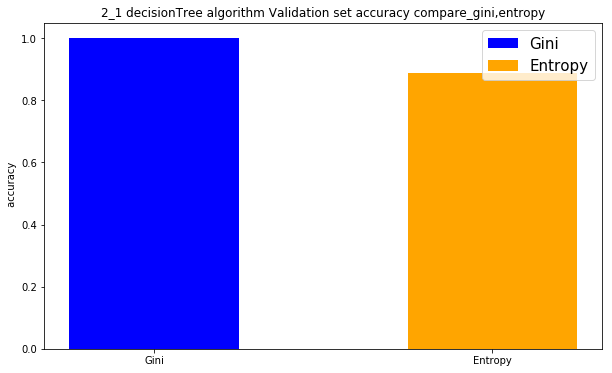

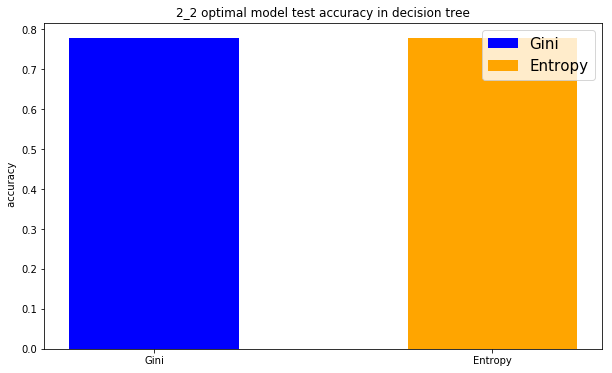


validation set으로 test 한 경우
gini criterion으로 훈련시킨 validation  accuracy값 :1.0
entropy criterion으로 훈련시킨 validation  accuracy값 :0.8888888888888888

validation set에서 찾은 최적의 criterion으로 훈련시킨 모델의 test accuracy
gini criterion으로 훈련시킨 경우의 test accuracy :0.7777777777777778
entropy criterion으로 훈련시킨 경우의 test accuracy :0.7777777777777778


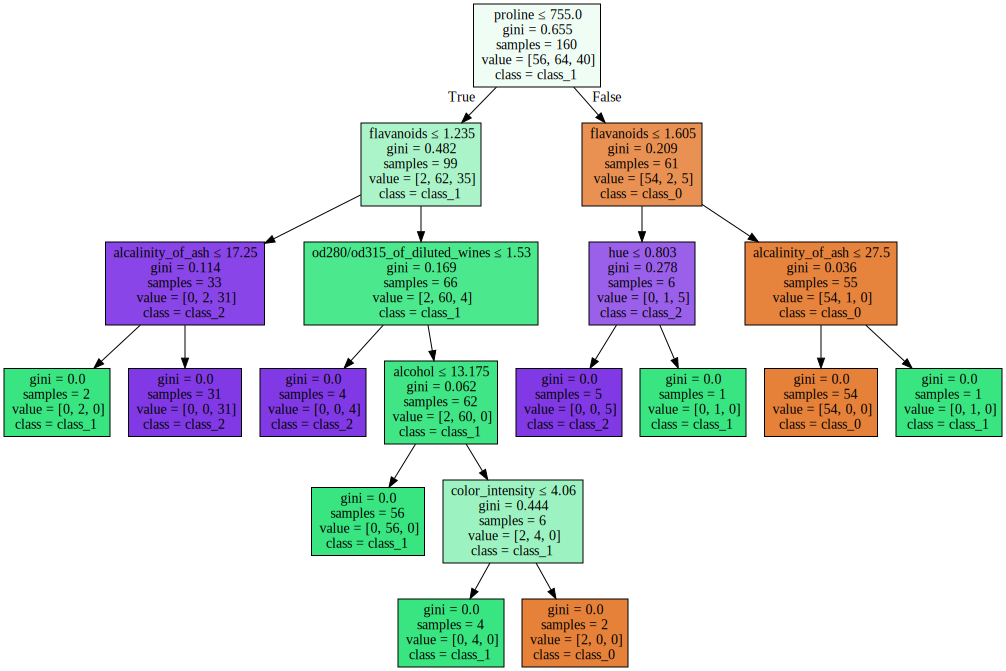

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

#2. Decision Tree
#gini 계수 쓰는 경우와 entropy 계수 쓰는 경우 비교
#hyperparameter 인 leaf node 숫자의 범위는 아래와 같이 정의하였다.
hyperparameter_size = range(2,20)

scores_valid_gini = 0
scores_test_gini = 0

scores_valid_en = 0
scores_test_en = 0

#training set(80%)을 가지고 validation set로 테스트 하여 validation accuracy 도출
#gini
treeC = DecisionTreeClassifier(criterion='gini',random_state=100)
treeC =treeC.fit(x_train_temp,y_train_temp)
scores_valid_gini=treeC.score(x_valid,y_valid)

#entropy
treeC2 = DecisionTreeClassifier(criterion='entropy',random_state=100)
treeC2 =treeC2.fit(x_train_temp,y_train_temp)
scores_valid_en=treeC2.score(x_valid,y_valid)



#gini , entropy사용시 validation accuracy
barWidth = 0.5
x=[0,1]
y=[scores_valid_gini, scores_valid_en]
r1=np.arange(len(y))


colors = ['blue','orange']
labels=['Gini', 'Entropy']
tempData = {'Gini':scores_valid_gini,'Entropy':scores_valid_en}
fig, ax = plt.subplots(figsize = (10,6) )


for i, label in enumerate(labels) :
     ax.bar(x[i],tempData[label],width = barWidth, color = colors[i],label = label)            


plt.xticks(x,(labels[0],labels[1]))
plt.legend(loc="upper right", fontsize=15)
plt.ylabel(' accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_1 decisionTree algorithm Validation set accuracy compare_gini,entropy')
plt.show()



#gini 와 entropy 중 validation set에서 가장 최적화된 트리가 test acc또한 좋은지 비교하기 위하여 둘의 test acc를 구한다.
treeGini = DecisionTreeClassifier(criterion='gini',random_state=100)
treeGini = treeGini.fit(x_train,y_train)
treeGini_score = treeGini.score(x_test,y_test)

treeEntro = DecisionTreeClassifier(criterion='entropy',random_state=100)
treeEntro = treeEntro.fit(x_train,y_train)
treeEntro_score = treeEntro.score(x_test,y_test)


y=[treeGini_score,treeEntro_score]
barWidth = 0.5
x=[0,1]
r1=np.arange(len(y))
colors = ['blue','orange']
tempData = {'Gini':treeGini_score,'Entropy':treeEntro_score}
fig, ax = plt.subplots(figsize = (10,6) )


for i, label in enumerate(labels) :
     ax.bar(x[i],tempData[label],width = barWidth, color = colors[i],label = label)            


plt.xticks(x,(labels[0],labels[1]))
plt.legend(loc="upper right", fontsize=15)
plt.ylabel(' accuracy')
plt.title("2_2 optimal model test accuracy in decision tree")
plt.show()


print('\nvalidation set으로 test 한 경우')
print('gini criterion으로 훈련시킨 validation  accuracy값 :'+ str(scores_valid_gini))
print('entropy criterion으로 훈련시킨 validation  accuracy값 :'+ str(scores_valid_en))

print('\nvalidation set에서 찾은 최적의 criterion으로 훈련시킨 모델의 test accuracy')
print('gini criterion으로 훈련시킨 경우의 test accuracy :'+str(y[0]))
print('entropy criterion으로 훈련시킨 경우의 test accuracy :'+str(y[1]))



#tree 출력
#validation set으로 찾은 최적의 파라미터로 그린  tree
if scores_valid_gini>scores_valid_en:
      dot_data = tree.export_graphviz(treeGini, out_file=None,
                               feature_names = wine.feature_names,
                               class_names = wine.target_names,
                               filled=True, 
                               special_characters=True)
else :
    dot_data = tree.export_graphviz(treeEntro, out_file=None,
                               feature_names = wine.feature_names,
                               class_names = wine.target_names,
                               filled=True, 
                               special_characters=True)
    
graph = graphviz.Source(dot_data)
graph


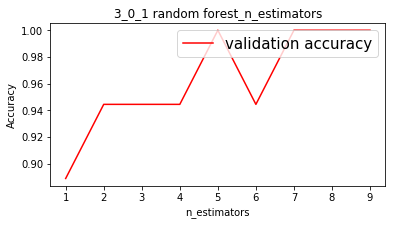

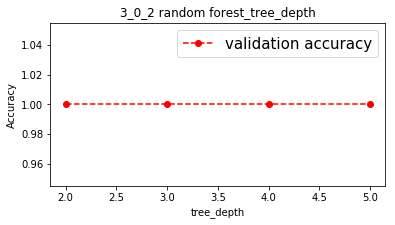

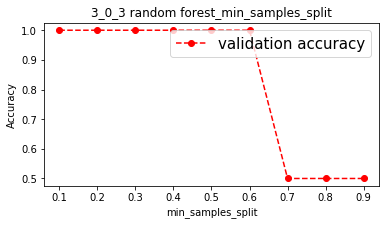

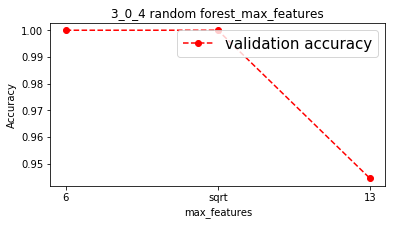

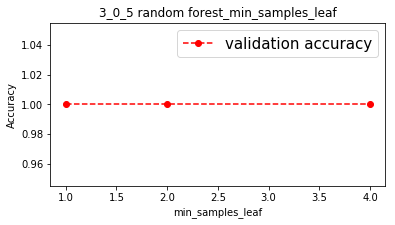

3_1 각각 파라미터가 최적화 된 값이 어느 곳인지?
treeNum : 5, validation accuracy : 1.0, test accuracy : 0.9444444444444444
treeDepth : 2, validation accuracy : 1.0, test accuracy : 1.0
min_samples_split : 0.1, validation accuracy : 1.0, test accuracy : 1.0
max_features : 6, validation accuracy : 1.0, test accuracy : 0.8888888888888888
min_samples_leaf : 1, validation accuracy : 1.0, test accuracy : 0.9444444444444444


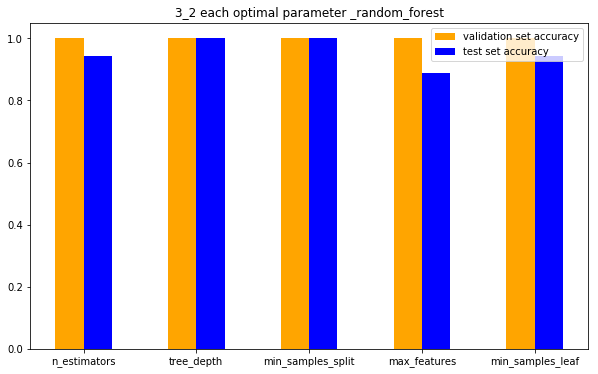

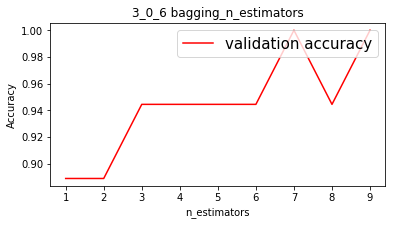

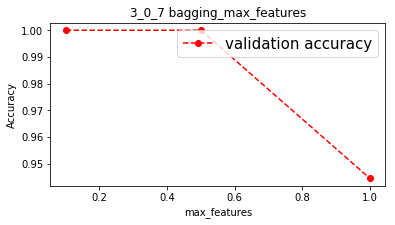

3_3 각각 파라미터가 최적화 된 값이 어느 곳인지?
treeNum : 7, validation accuracy : 1.0, test accuracy : 0.9444444444444444
max_features : 0.1, validation accuracy : 1.0, test accuracy : 0.7222222222222222


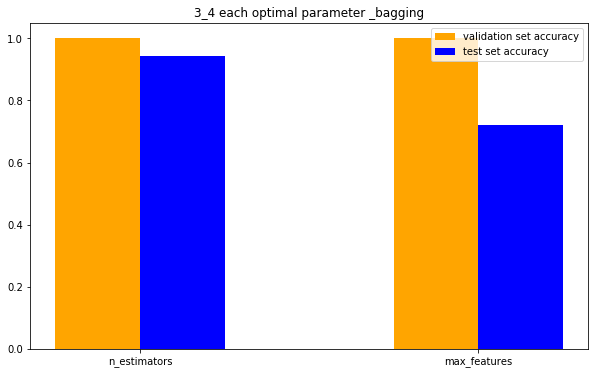

3_5 random forest vs bagging
random forest _test accuracy:  1.0
bagging _test accuracy : 0.9444444444444444


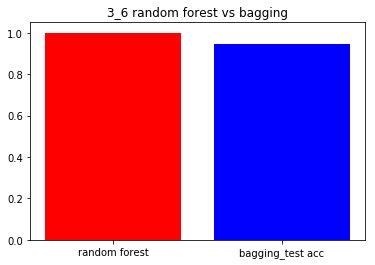

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import math

feature = wine.data.shape[1]
n_estimators= range(1,10)
max_features = [round(feature/2),'sqrt',feature]
max_depth = range(2,6)
min_samples_split = np.arange(0.1,1.0,0.1)
min_samples_leaf =[1,2,4]
scores_valid1 = []
scores_valid2 = []
scores_valid3 = []
scores_valid4 = []
scores_valid5 = []
#random forest(5가지의 parameter를 조정하고자 함)
#1. tree Num
#training set을 가지고 validation set로 테스트 하여 validation accuracy 도출
#가장 성능 좋았던 값으로 훈련시키고 test accuracy구하기
temp = 0
for k in n_estimators:
    randomForest = RandomForestClassifier(n_estimators = k,random_state=100)
    randomForest = randomForest.fit(x_train_temp,y_train_temp)
    temp1 = randomForest.score(x_valid,y_valid)
    scores_valid1.append(temp1)
    if temp < temp1 :
        max_max_treeNum = k
        temp=temp1
    
rf1 = RandomForestClassifier(n_estimators = max_max_treeNum, random_state=100)
rf1 = rf1.fit(x_train,y_train)
scores_test1 = rf1.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(n_estimators,scores_valid1,color='red',label='validation accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_1 random forest_n_estimators')
plt.show()

#2. tree depth
temp = 0
for k in max_depth:
    randomForest = RandomForestClassifier(max_depth=k, random_state=100)
    randomForest = randomForest.fit(x_train_temp,y_train_temp)
    temp1 = randomForest.score(x_valid,y_valid)
    scores_valid2.append(temp1)
    if temp < temp1 :
            max_max_depth = k
            temp=temp1
            
            
rf2 = RandomForestClassifier(max_depth =max_max_depth , random_state=100)
rf2 = rf2.fit(x_train,y_train)
scores_test2 = rf2.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(max_depth , scores_valid2,color='red',marker='o',label='validation accuracy',ls="--")
plt.xlabel('tree_depth')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_2 random forest_tree_depth')
plt.show()

#3. min_samples_split
temp = 0
for k in min_samples_split:
    randomForest = RandomForestClassifier(min_samples_split = k, random_state=100)
    randomForest = randomForest.fit(x_train_temp,y_train_temp)
    temp1 = randomForest.score(x_valid,y_valid)
    scores_valid3.append(temp1)
    if temp < temp1 :
        max_min_samples_split = k
        temp=temp1
        
        
rf3 = RandomForestClassifier(min_samples_split = max_min_samples_split, random_state=100)
rf3 = rf3.fit(x_train,y_train)
scores_test3 = rf3.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(min_samples_split , scores_valid3,color='red',label='validation accuracy',marker='o',ls="--")
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_3 random forest_min_samples_split')
plt.show()


#4. max_features
temp = 0
for k in max_features:
    randomForest = RandomForestClassifier(max_features = k, random_state=100)
    randomForest = randomForest.fit(x_train_temp,y_train_temp)
    temp1 = randomForest.score(x_valid,y_valid)
    scores_valid4.append(temp1)
    if temp < temp1 :
        max_max_features = k
        temp=temp1
        
        
rf4 = RandomForestClassifier(max_features = max_max_features, random_state=100)
rf4 = rf4.fit(x_train,y_train)
scores_test4 = rf4.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(max_features, scores_valid4,color='red',label='validation accuracy',marker='o',ls="--")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_4 random forest_max_features')
plt.show()


#5. min_samples_leaf
temp = 0
for k in min_samples_leaf:
    randomForest = RandomForestClassifier(min_samples_leaf = k, random_state=100)
    randomForest = randomForest.fit(x_train_temp,y_train_temp)
    temp1 = randomForest.score(x_valid,y_valid)
    scores_valid5.append(temp1)
    if temp < temp1 :
        max_min_samples_leaf = k
        temp=temp1
        
        
rf5 = RandomForestClassifier(min_samples_leaf = max_min_samples_leaf, random_state=100)
rf5 = rf5.fit(x_train,y_train)
scores_test5 = rf5.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(min_samples_leaf, scores_valid5,color='red',label='validation accuracy',marker='o',ls="--")
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_5 random forest_min_samples_leaf')
plt.show()

#validation set을 test하여 얻은 최적화한 model로  확인한 test accuracy
print('3_1 각각 파라미터가 최적화 된 값이 어느 곳인지?')
y = [max(scores_valid1),max(scores_valid2),max(scores_valid3),max(scores_valid4),max(scores_valid5)]
z = [scores_test1,scores_test2,scores_test3,scores_test4,scores_test5]

print('treeNum : ' + str(max_max_treeNum) +', validation accuracy : ' + str(y[0])+', test accuracy : ' + str(z[0]))
print('treeDepth : ' + str(max_max_depth) +', validation accuracy : ' + str(y[1])+', test accuracy : ' + str(z[1]))
print('min_samples_split : ' + str(max_min_samples_split) +', validation accuracy : ' + str(y[2])+', test accuracy : ' + str(z[2]))
print('max_features : ' + str(max_max_features)+', validation accuracy : ' + str(y[3])+', test accuracy : ' + str(z[3]))
print('min_samples_leaf : ' + str(max_min_samples_leaf)+', validation accuracy : ' + str(y[4])+', test accuracy : ' + str(z[4]))

#bar graph를 통해 확인한 accuracy
barWidth = 0.25
colors = ['red','blue','orange','lightgreen','purple']
r1=np.arange(len(y))
r2 = [x+barWidth for x in r1]

plt.figure(figsize=(10,6))
plt.bar(r1,y, color=colors[2], width = barWidth, label='validation set accuracy')
plt.bar(r2,z, color=colors[1], width = barWidth, label='test set accuracy')

plt.xticks([r + barWidth-0.125 for r in range(len(y))],('n_estimators','tree_depth','min_samples_split','max_features','min_samples_leaf'))
plt.title("3_2 each optimal parameter _random_forest")
plt.legend(loc="upper right")
plt.show()



#bagging
n_estimators= range(1,10)
max_features = [0.1,0.5,1.0]
bag_valid1 = []
bag_valid2 = []
#random forest
#1. tree Num
#training set을 가지고 validation set로 테스트 하여 validation accuracy 도출
#가장 성능 좋았던 값으로 훈련시키고 test accuracy구하기
temp=0
for k in n_estimators:
    bag= BaggingClassifier(n_estimators = k, random_state=100)
    bag = bag.fit(x_train_temp,y_train_temp)
    temp1=bag.score(x_valid,y_valid)
    bag_valid1.append(temp1)
    if temp < temp1 :
        max_max_treeNum2= k
        temp=temp1
        
bag1 = BaggingClassifier(n_estimators = max_max_treeNum2, random_state=100)
bag1 = bag1.fit(x_train,y_train)
bag_test1 = bag1.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(n_estimators, bag_valid1,color='red',label='validation accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_6 bagging_n_estimators')
plt.show()


#2. max_features
temp=0
for k in max_features:
    bag = BaggingClassifier(n_estimators = max_max_treeNum,max_features=k, random_state=100)
    bag = bag.fit(x_train_temp,y_train_temp)
    temp1=bag.score(x_valid,y_valid)
    bag_valid2.append(temp1)
    if temp < temp1 :
        max_max_features2 = k
        temp=temp1
        
        
bag2 = BaggingClassifier(max_features =max_max_features2, random_state=100)
bag2 = bag2.fit(x_train,y_train)
bag_test2 = bag2.score(x_test,y_test)

plt.figure(figsize=(6,3))
plt.plot(max_features, bag_valid2,color='red',label='validation accuracy',marker='o',ls="--")
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('3_0_7 bagging_max_features')
plt.show()

y2 = [max(bag_valid1),max(bag_valid2)]
z2 = [bag_test1,bag_test2]
#validation set을 test하여 얻은 최적화한 model로  확인한 test accuracy
print('3_3 각각 파라미터가 최적화 된 값이 어느 곳인지?')
print('treeNum : ' + str(max_max_treeNum2) +', validation accuracy : ' + str(y2[0])+ ', test accuracy : ' + str(bag_test1))
print('max_features : ' + str(max_max_features2) +', validation accuracy : ' + str(y2[1])+ ', test accuracy : ' + str(bag_test2))


#bagging의 가장 좋은 성능을 가진 parameter들에 대한 validation set, test set accuracy값
barWidth = 0.25

r1=np.arange(len(y2))
r2 = [x+barWidth for x in r1]

plt.figure(figsize=(10,6))
plt.bar(r1,y2, color=colors[2], width = barWidth, label='validation set accuracy')
plt.bar(r2,z2, color=colors[1], width = barWidth, label='test set accuracy')

plt.xticks([r + barWidth-0.125 for r in range(len(y2))],('n_estimators','max_features'))
plt.title("3_4 each optimal parameter _bagging")
plt.legend(loc="upper right")
plt.show()

#random forest로 가장 최적화된 model의 test acc와 bagging 에서 가장 최적화된 model의 test acc비교
#validation set에서 가장 높은 정확도를 나타낸 것으로 training 을 할 것이다.
#그 후 나타난 test acc비교
#random forest
#가장 전체적인 성능이 좋았던 tree Depth 
m = max(y)
z=np.array(z)
max_rf=z[np.where(y==m)]
test_acc_1 =max_rf.max()

#bagging
m=max(y2)
z2=np.array(z2)
max_bag=z2[np.where(y2==m)]
test_acc_2 =max_bag.max()



#graph로 비교
x = [0,1]
y = [test_acc_1,test_acc_2]
fig,ax = plt.subplots()
labels_result = ['random forest_test acc','bagging_test acc' ]
tempData = {'random forest_test acc':test_acc_1 ,'bagging_test acc':test_acc_2}

for i, label in enumerate(labels_result) :
    ax.bar(x[i],tempData[label], color = colors[i],label = label)

plt.xticks(x,('random forest','bagging_test acc'))
plt.title("3_6 random forest vs bagging")


#test acc비교
print('3_5 random forest vs bagging')
print('random forest _test accuracy:  ' + str(y[0]))
print('bagging _test accuracy : ' + str(y[1]))


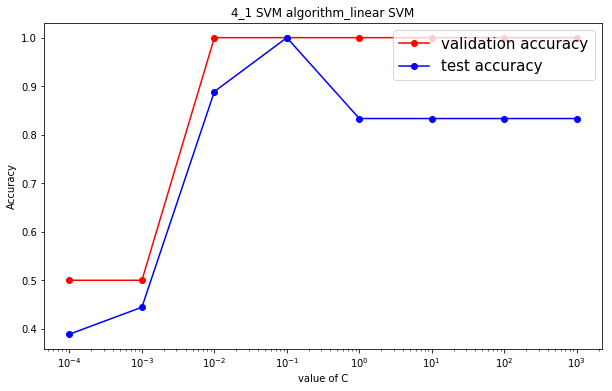

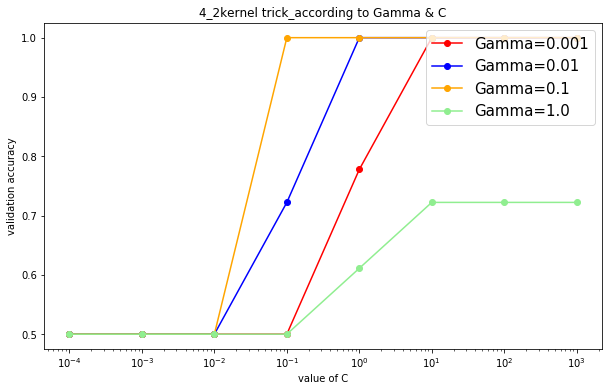

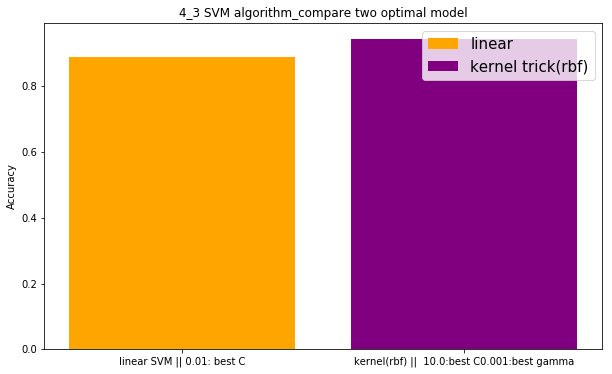


validation set으로 test 한 경우
SVM linear로 훈련시킨 최적의 C값 :0.01
SVM kernel(rbf)로 훈련시킨 최적의 C,gamma 값 :10.0 0.001

validation set에서 찾은 최적의 c,gamma값으로 훈련시킨 모델의 test accuracy
SVM linear으로 훈련시킨 경우의 test accuracy :0.8888888888888888
SVM kernel(rbf)로  훈련시킨 경우의 test accuracy :0.9444444444444444


In [11]:
#4. SVM
#전처리된 x이용
#linear SVM과 kernel Trick이 적용된 SVM간의 비교
from sklearn.svm import SVC
hyperparameter_C = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
hyperparameter_Gamma = [0.001,0.01,0.1,1]


#svm_linear에 이용할 list
scores_valid_SVMA = []
scores_train_SVMA = []
scores_test_SVMA = []
best_acc_lin = 0   

#training set을 가지고 validation set로 테스트 하여 validation accuracy 도출
for k in range(0,len(hyperparameter_C)):
    svm_linear=SVC(kernel='linear',C=hyperparameter_C[k],random_state=100)
    svm_linear.fit(x_train_temp1,y_train_temp)
    scores_valid_SVMA.append(svm_linear.score(x_valid1,y_valid))
    temp=svm_linear.score(x_valid1,y_valid)
    #최적의 성능을 가진 것을 훈련시키기 위함
    if temp > best_acc_lin:
            best_acc_lin = temp
            best_para_lin = {'C':hyperparameter_C[k]}
    

    
#전체 training set를 가지고 test set을 테스트하여 training accuracy, test accuracy 도출
for k in range(0,len(hyperparameter_C)) :
    svm_linear=SVC(kernel='linear',C=hyperparameter_C[k],random_state=100)
    svm_linear.fit(x_train1,y_train)
    scores_train_SVMA.append(svm_linear.score(x_train1,y_train))
    scores_test_SVMA.append(svm_linear.score(x_test1,y_test))

    
#svm_linear 출력
labels11=['validation accuracy', 'test accuracy']  
colors = ['red','blue','orange']
tempData = {'validation accuracy':scores_valid_SVMA,'test accuracy':scores_test_SVMA}
fig, ax = plt.subplots(figsize = (10,6))

for i, label in enumerate(labels11) :
    ax.plot(hyperparameter_C,tempData[label], color = colors[i],label = label,marker='o',linestyle='solid')
    
plt.xscale('log')
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of C')
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('4_1 SVM algorithm_linear SVM')
plt.show()


#svm(kernel = 'rbf')
#svm_nonlinear에 이용할 list:scores_va=[]
hyperparameter_num = range(0,40)
scores_va = np.zeros((4,len(hyperparameter_C)))
scores_train_SVMB = []


best_acc_ker = 0   
#training set을 가지고 validation set로 테스트 하여 validation accuracy 도출
for k in range(0,len(hyperparameter_Gamma)):
    for i in range(0,len(hyperparameter_C)) :
        svm_kernel=SVC(kernel='rbf',gamma=hyperparameter_Gamma[k],C=hyperparameter_C[i],random_state=100)
        svm_kernel.fit(x_train_temp1,y_train_temp)
        temp = svm_kernel.score(x_valid1,y_valid)
        #최적의 성능을 가진 것을 훈련시키기 위함
        if temp > best_acc_ker:
            best_acc_ker = temp
            best_para_ker = {'C':hyperparameter_C[i], 'gamma' : hyperparameter_Gamma[k]}
        scores_va[k][i]= (svm_kernel.score(x_valid1,y_valid))


#C변화량에 따른 각 gamma적용한 경우, validation을 test set으로 사용시 accuracy
labels4 =['Gamma=0.001', 'Gamma=0.01','Gamma=0.1','Gamma=1.0']  
colors = ['red','blue','orange','lightgreen']

score1=scores_va[0,:].flatten()
score2=scores_va[1,:].flatten()
score3=scores_va[2,:].flatten()
score4=scores_va[3,:].flatten()

score1=list(score1)
score2=list(score2)
score3=list(score3)
score4=list(score4)

tempData = {'Gamma=0.001':score1 , 'Gamma=0.01':score2,'Gamma=0.1':score3,'Gamma=1.0':score4 }
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels4) :
    ax.plot(hyperparameter_C, tempData[label], color = colors[i],label = label,marker='o',linestyle='solid')
            
plt.xscale('log')
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of C')
plt.ylabel('validation accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('4_2kernel trick_according to Gamma & C')
plt.show()



#linear SVM과 kernel trick='rbf'의  validation set에서 가장 좋은 성능으 보인 파라미트로 최적화한 모델의 test accuracy비교
#linear
svm_linear_result=SVC(kernel='linear', **best_para_lin)
svm_linear_result.fit(x_train1,y_train)
scores_test_SVM_lin = svm_linear_result.score(x_test1,y_test)


#kernel trick = 'rbf'
svm_kernel_result=SVC(kernel='rbf',**best_para_ker)
svm_kernel_result.fit(x_train1,y_train)
scores_test_ker = svm_kernel_result.score(x_test1,y_test)

label_result = ['linear','kernel trick(rbf)']
tempData = {'linear':scores_test_SVM_lin ,'kernel trick(rbf)':scores_test_ker}
fig, ax = plt.subplots(figsize = (10,6))

x=[0,1]

for i, label in enumerate(label_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xticks(x,('linear SVM || '+ str(best_para_lin['C'])+': best C','kernel(rbf) ||  '+str(best_para_ker['C'])+':best C'+str(best_para_ker['gamma'])+':best gamma'))
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('4_3 SVM algorithm_compare two optimal model')
plt.show()

print('\nvalidation set으로 test 한 경우')
print('SVM linear로 훈련시킨 최적의 C값 :'+ str(best_para_lin['C']))
print('SVM kernel(rbf)로 훈련시킨 최적의 C,gamma 값 :'+ str(best_para_ker['C'])+' '+str(best_para_ker['gamma']))

print('\nvalidation set에서 찾은 최적의 c,gamma값으로 훈련시킨 모델의 test accuracy')
print('SVM linear으로 훈련시킨 경우의 test accuracy :'+ str(scores_test_SVM_lin))
print('SVM kernel(rbf)로  훈련시킨 경우의 test accuracy :'+ str(scores_test_ker))



# #[2] Cross-validation 을 이용한 최적화된 알고리즘 탐색

# 1. k-fold cv

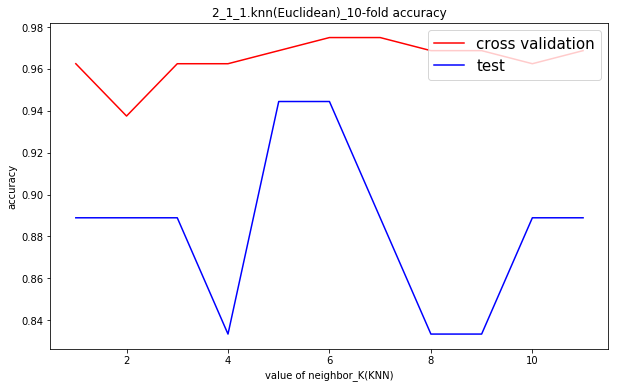

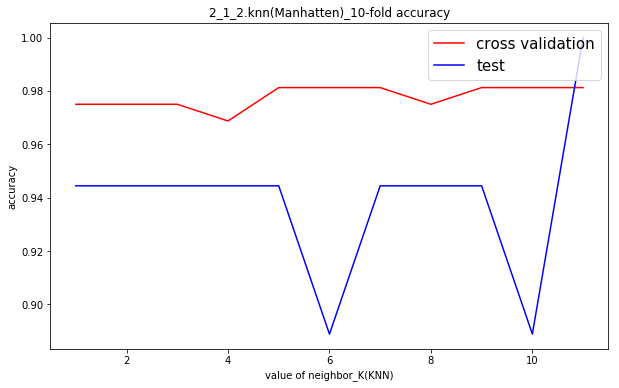

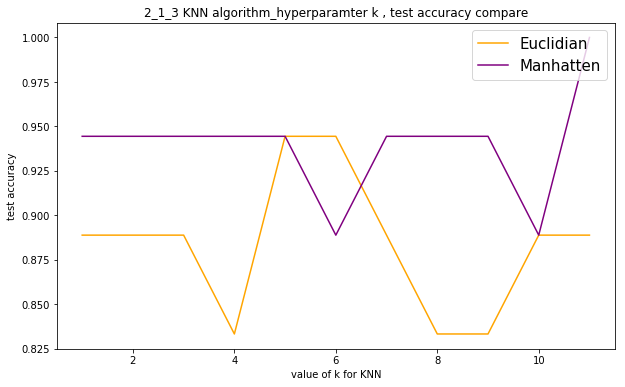


10-fold에서 찾은 cross-validation accuracy
Euclidean으로 훈련시킨 경우의 cross-validation accuracy :0.975
Manhattan으로 훈련시킨 경우의 cross-validation accuracy :0.98125


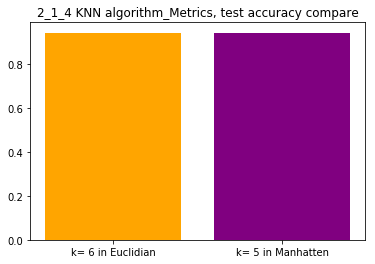


10-fold으로 test 한 경우
Euclidian 으로 거리를 잰 경우의 최적의 k값 :6
Manhattan 으로 거리를 잰 경우의 최적의 k값 :5

10-fold에서 찾은 최적의 k값으로 훈련시킨 모델의 test accuracy
Euclidian 으로 거리를 잰 경우의 test accuracy :0.9444444444444444
Manhattan 으로 거리를 잰 경우의 test accuracy :0.9444444444444444

test set으로 test 한 경우
Euclidian 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :5
Manhattan 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :11


In [32]:
#cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import LeaveOneOut, KFold

sample = len(x_train[:,0])

#1.k-fold cv

#10-fold이용
#10-fold인 경우 최적화된 k 찾기
#전처리된 x이용
#knn
scores_valid_knn1=[]
scores_valid_knn2=[]
kfold = KFold(n_splits=10, random_state=100)
hyperparameterK = range(1,12)
for k in hyperparameterK :
    #Euclidean
    knn1 = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski',n_jobs=-1)
    scores1 = cross_val_score(knn1, x_train1,y_train, cv=kfold)
    scores_valid_knn1.append(np.mean(scores1))
    
    #Manhattan
    knn2 = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski',n_jobs=-1)
    scores2 = cross_val_score(knn2, x_train1,y_train, cv=kfold)
    scores_valid_knn2.append(np.mean(scores2))    

#cross-validation에서 가장 높았던 accuracy를 기록한 K값 저장(1부터 시작하므로 +1)
maxEuc = scores_valid_knn1.index(max(scores_valid_knn1))+1
maxMan = scores_valid_knn2.index(max(scores_valid_knn2))+1


#Euclidean 거리측정 방법 이용   
labels5=['cross validation','test'] 
colors = ['red','blue']

tempData = {'cross validation': scores_valid_knn1,'test':scores_test_knnA}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels5) :
    ax.plot(hyperparameterK, tempData[label], color = colors[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of neighbor_K(KNN)')
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_1_1.knn(Euclidean)_10-fold accuracy')
plt.show() 

#Manhatten거리측정 방법 이용 
tempData = {'cross validation': scores_valid_knn2,'test':scores_test_knnB}
fig,ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(labels5) :
    ax.plot(hyperparameterK, tempData[label], color = colors[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of neighbor_K(KNN)')
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_1_2.knn(Manhatten)_10-fold accuracy')
plt.show()
 


#유클리드 메트릭과 맨허튼 메트릭의 k에 따른 최적화 시킨 모델 test acc 비교
labels_result = ['Euclidian','Manhatten']  
colors_result = ['orange','purple']
tempData = {'Euclidian':scores_test_knnA,'Manhatten':scores_test_knnB}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels_result) :
    ax.plot(hyperparameter_K,tempData[label], color = colors_result[i],label = label)       

plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of k for KNN')
plt.ylabel('test accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_1_3 KNN algorithm_hyperparamter k , test accuracy compare')
plt.show()

print('\n10-fold에서 찾은 cross-validation accuracy')
print('Euclidean으로 훈련시킨 경우의 cross-validation accuracy :'+ str(max(scores_valid_knn1)))
print('Manhattan으로 훈련시킨 경우의 cross-validation accuracy :'+ str(max(scores_valid_knn2)))

#cross-validation 을 테스트하였을 때 , 가장 좋았던 최적의 파라미터로 모델학습시키기
#euclidean,Manhattan의 test acc 비교
knnEuc = KNeighborsClassifier(n_neighbors=maxEuc,p=2,metric='minkowski',n_jobs=-1)
knnEuc.fit(x_train1,y_train)
knnMan = KNeighborsClassifier(n_neighbors=maxMan,p=1,metric='minkowski',n_jobs=-1)
knnMan.fit(x_train1,y_train)

knnEuc_score = knnEuc.score(x_test1,y_test)
knnMan_score = knnMan.score(x_test1,y_test)

x = [0,1]
y = [maxEuc,maxMan]

fig,ax = plt.subplots()
tempData = {'Euclidian':knnEuc_score,'Manhatten':knnMan_score}

for i, label in enumerate(labels_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)

plt.xticks(x,('k= '+ str(y[0])+' in Euclidian','k= '+str(y[1])+' in Manhatten'))
plt.title("2_1_4 KNN algorithm_Metrics, test accuracy compare")
plt.show()

print('\n10-fold으로 test 한 경우')
print('Euclidian 으로 거리를 잰 경우의 최적의 k값 :'+ str(y[0]))
print('Manhattan 으로 거리를 잰 경우의 최적의 k값 :'+ str(y[1]))

print('\n10-fold에서 찾은 최적의 k값으로 훈련시킨 모델의 test accuracy')
print('Euclidian 으로 거리를 잰 경우의 test accuracy :'+ str(knnEuc_score))
print('Manhattan 으로 거리를 잰 경우의 test accuracy :'+ str(knnMan_score))

print('\ntest set으로 test 한 경우')
print('Euclidian 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :'+ str(maxEuc_test))
print('Manhattan 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :'+ str(maxMan_test))

#model을 추후에 비교하기 위함
y=[knnEuc_score,knnMan_score]
maxKnn = max(y)




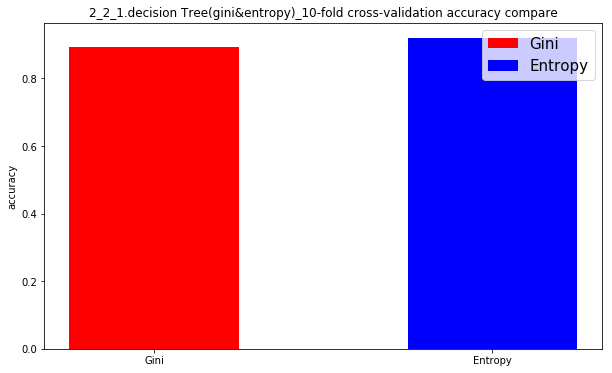


10-fold에서 찾은 cross-validation accuracy
gini criterion으로 훈련시킨 경우의 cross-validation accuracy :0.89375
entropy criterion으로 훈련시킨 경우의 cross-validation accuracy :0.91875


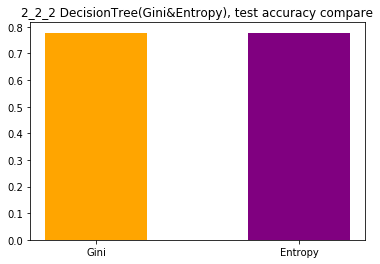


test set으로 test 한 경우
gini criterion으로 훈련시킨 경우의 test accuracy:0.7777777777777778
entropy criterion으로 훈련시킨 경우의 test accuracy :0.7777777777777778


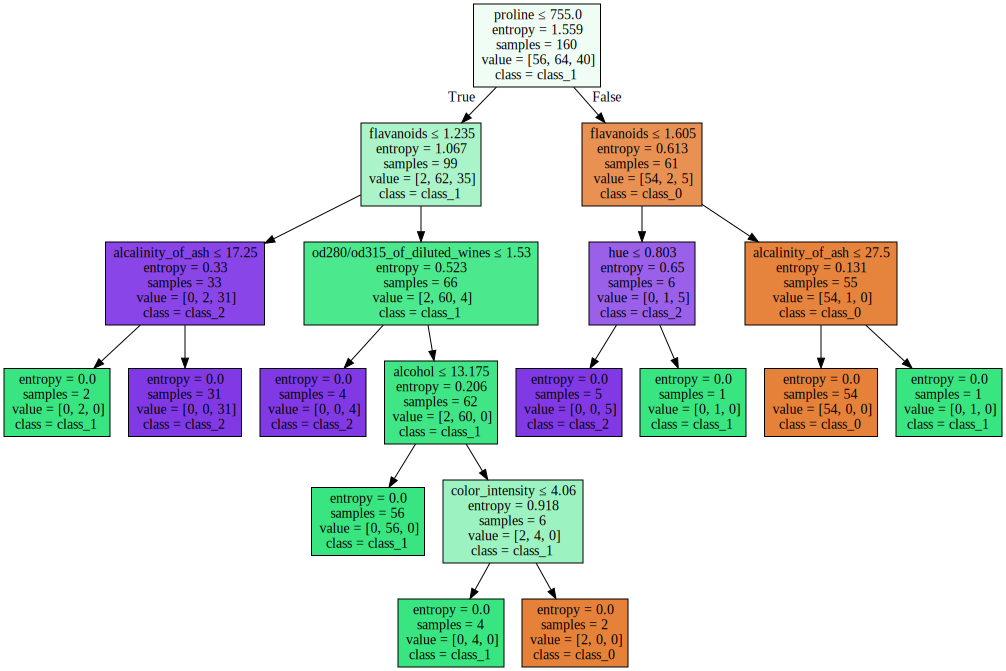

In [33]:
#2.decision tree
scores_valid_treeA=0
scores_valid_treeB=0


#gini,entropy를 적용하였을 때, 각각 cross-validation 값 저장
treeCross = DecisionTreeClassifier(criterion='gini',random_state=100)
scores = cross_val_score(treeCross, x_train,y_train, cv=kfold)
scores_valid_treeA = np.mean(scores)

treeCross2 = DecisionTreeClassifier(criterion='entropy',random_state=100)
scores2 = cross_val_score(treeCross2, x_train,y_train, cv=kfold)
scores_valid_treeB=np.mean(scores2)


#gini출력와 entorpy의 cross validation 값 출력
y=[scores_valid_treeA,scores_valid_treeB]
barWidth = 0.5
r1=np.arange(len(y))
labels5=['Gini','Entropy'] 
colors = ['red','blue']

#scores_test_gini는 1번에서 구한 leaf node에 따른 전체적인 test acc이다.
tempData = {'Gini': scores_valid_treeA,'Entropy':scores_valid_treeB}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels5) :
    ax.bar(r1[i],tempData[label],width = barWidth, color = colors[i],label = label)

plt.xticks(r1,(labels5[0],labels5[1]))
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_1.decision Tree(gini&entropy)_10-fold cross-validation accuracy compare')
plt.show()    
    
print('\n10-fold에서 찾은 cross-validation accuracy')
print('gini criterion으로 훈련시킨 경우의 cross-validation accuracy :'+ str(scores_valid_treeA))
print('entropy criterion으로 훈련시킨 경우의 cross-validation accuracy :'+ str(scores_valid_treeB))



#gini 와 entropy의 test acc비교하기
#Gini로 training된 tree
treeGini = DecisionTreeClassifier(criterion='gini', random_state=100)
treeGini = treeGini.fit(x_train,y_train)
treeGini_score = treeGini.score(x_test,y_test)

#entropy로 training된 tree
treeEntro = DecisionTreeClassifier(criterion='entropy',random_state=100)
treeEntro = treeEntro.fit(x_train,y_train)
treeEntro_score = treeEntro.score(x_test,y_test)

y = [treeGini_score,treeEntro_score]
r1=np.arange(len(y))
fig,ax = plt.subplots()
tempData = {'Gini':treeGini_score ,'Entropy':treeEntro_score}

for i, label in enumerate(labels5) :
    ax.bar(r1[i],tempData[label], width = barWidth,color = colors_result[i],label = label)

plt.xticks(r1,(labels5[0],labels5[1]))
plt.title("2_2_2 DecisionTree(Gini&Entropy), test accuracy compare")
plt.show()


print('\ntest set으로 test 한 경우')
print('gini criterion으로 훈련시킨 경우의 test accuracy:'+ str(treeGini_score))
print('entropy criterion으로 훈련시킨 경우의 test accuracy :'+ str(treeEntro_score))

#추후의 모델 비교를 위함
maxTree = max(y)


#tree 출력
#validation set에서 찾은 최적의 파라미터로 그린 tree
if scores_valid_treeA>scores_valid_treeB :
    dot_data = tree.export_graphviz(treeGini, out_file=None,
                               feature_names = wine.feature_names,
                               class_names = wine.target_names,
                               filled=True, 
                               special_characters=True)
else:
    dot_data = tree.export_graphviz(treeEntro, out_file=None,
                               feature_names = wine.feature_names,
                               class_names = wine.target_names,
                               filled=True, 
                               special_characters=True)    
graph = graphviz.Source(dot_data)
graph


# Tuning hyper-parameters _randomForest_for accuracy

2_3_1 randomForest 10-fold Data


,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,accuracy
0,1,6,4,3,1,0.88750
1,10,6,4,3,1,0.95000
2,50,6,4,3,1,0.98125
3,100,6,4,3,1,0.96250
4,150,6,4,3,1,0.96250
5,1,6,4,5,1,0.90000
6,10,6,4,5,1,0.95000
7,50,6,4,5,1,0.98125
8,100,6,4,5,1,0.96250
9,150,6,4,5,1,0.96250


# Tuning hyper-parameters _bagging_for accuracy

2_3_2 Bagging 10-fold Data


,n_estimators,max_samples,max_features,accuracy
0,1,0.1,0.1,0.65000
1,10,0.1,0.1,0.77500
2,50,0.1,0.1,0.86875
3,100,0.1,0.1,0.91250
4,150,0.1,0.1,0.93125
5,1,0.5,0.1,0.68125
6,10,0.5,0.1,0.79375
7,50,0.5,0.1,0.86250
8,100,0.5,0.1,0.93125
9,150,0.5,0.1,0.93750



10-fold에서 찾은 cross-validation accuracy
randomForest으로 훈련시킨 경우의 cross-validationaccuracy :0.9875
Bagging 으로  훈련시킨 경우의 cross-validation accuracy :0.98125


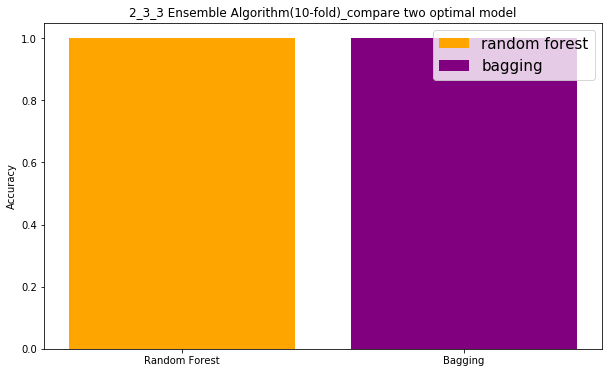


10-fold으로 test 한 경우
randomForest으로 훈련시킨 최적의 parameter값
{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Bagging 으로 훈련시킨 최적의 parameter값 
{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}

10-fold에서 찾은 최적의 parameter값으로 훈련시킨 모델의 test accuracy
randomForest으로 훈련시킨 경우의 test accuracy :1.0
Bagging 으로  훈련시킨 경우의 test accuracy :1.0


In [34]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import math
feature = wine.data.shape[1]
max_features = [round(feature/2),'sqrt',feature]
n_estimators= [1,10,50,100,150]
max_depth = [4,7,11]
min_samples_split = [3,5,10]
min_samples_leaf = [1, 2, 4]

rf_param_grid = {
             'n_estimators' : n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
    }


#train set 90%개로 grid_search를 이용하여 학습시켰다.
print("# Tuning hyper-parameters _randomForest_for accuracy\n")
grid_randomForest =GridSearchCV(estimator = RandomForestClassifier(random_state=100),param_grid= rf_param_grid, cv=kfold, n_jobs = -1,return_train_score=True)
grid_randomForest.fit(x_train, y_train)

#각각 파라미터 마다 어떠한 결과가 나왔는지 dataframe출력
print("2_3_1 randomForest 10-fold Data")
import pandas as pd
pd.set_option('display.max_columns',None)
data = pd.DataFrame()
data['n_estimators']=grid_randomForest.cv_results_['param_n_estimators']
data['max_features']=grid_randomForest.cv_results_['param_max_features']
data['max_depth']=grid_randomForest.cv_results_['param_max_depth']
data['min_samples_split']=grid_randomForest.cv_results_['param_min_samples_split']
data['min_samples_leaf']=grid_randomForest.cv_results_['param_min_samples_leaf']
data['accuracy']=grid_randomForest.cv_results_['mean_test_score']
display(data)



#bagging
max_samples = [0.1,0.5,1.0]
max_fea = [0.1,0.5,1.0]
bag_param_grid = {
    'n_estimators' : n_estimators,
    'max_samples': max_samples,
    'max_features': max_fea
}
#train set 90%개로 grid_search를 이용하여 학습시켰다.
print("# Tuning hyper-parameters _bagging_for accuracy\n")
grid_bag = GridSearchCV(estimator = BaggingClassifier(random_state=100),param_grid= bag_param_grid, cv=kfold)
grid_bag.fit(x_train, y_train)

#각각 파라미터 마다 어떠한 결과가 나왔는지 dataframe출력
print("2_3_2 Bagging 10-fold Data")
data2 = pd.DataFrame()
data2['n_estimators']=grid_bag.cv_results_['param_n_estimators']
data2['max_samples']=grid_bag.cv_results_['param_max_samples']
data2['max_features']=grid_bag.cv_results_['param_max_features']
data2['accuracy']=grid_bag.cv_results_['mean_test_score']
display(data2)



#validation accuracy 무엇이 더 좋은지
best_acc_rf = grid_randomForest.best_score_
best_acc_bag = grid_bag.best_score_
print('\n10-fold에서 찾은 cross-validation accuracy')
print('randomForest으로 훈련시킨 경우의 cross-validationaccuracy :'+ str(best_acc_rf))
print('Bagging 으로  훈련시킨 경우의 cross-validation accuracy :'+ str(best_acc_bag))

#최종 test accuracy비교
#randomforest
best_para_rf = grid_randomForest.best_params_
randomForest_result = RandomForestClassifier(**best_para_rf,random_state=100)
randomForest_result.fit(x_train,y_train)
scores_rf = randomForest_result.score(x_test,y_test)

#bagging
best_para_bag = grid_bag.best_params_
bag_result = BaggingClassifier(**best_para_bag,random_state=100)
bag_result.fit(x_train,y_train)
scores_bag = bag_result.score(x_test,y_test)


label_result = ['random forest','bagging']
tempData = {'random forest':scores_rf ,'bagging':scores_bag}
fig, ax = plt.subplots(figsize = (10,6))

x=[0,1]

for i, label in enumerate(label_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xticks(x,('Random Forest','Bagging'))
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_3_3 Ensemble Algorithm(10-fold)_compare two optimal model')
plt.show()

print('\n10-fold으로 test 한 경우')
print('randomForest으로 훈련시킨 최적의 parameter값\n'+ str(best_para_rf))
print('Bagging 으로 훈련시킨 최적의 parameter값 \n'+ str(best_para_bag))

print('\n10-fold에서 찾은 최적의 parameter값으로 훈련시킨 모델의 test accuracy')
print('randomForest으로 훈련시킨 경우의 test accuracy :'+ str(scores_rf))
print('Bagging 으로  훈련시킨 경우의 test accuracy :'+ str(scores_bag))

#추후 모델비교를 위함.
y=[scores_rf,scores_bag]
maxEns = max(y)


2_4_1 SVM(kernel='linear') 실행 시 Data


,param_grid_C,mean_test_accuracy
0,0.0001,0.40000
1,0.001,0.44375
2,0.01,0.98750
3,0.1,0.98750
4,1,0.98125
5,10,0.98125
6,100,0.98125
7,1000,0.98125


2_4_2 SVM(kernel='rbf') 실행 시 Data


,param_grid_gamma,param_grid_C,mean_test_accuracy
0,0.001,0.0001,0.40000
1,0.01,0.0001,0.40000
2,0.1,0.0001,0.40000
3,1,0.0001,0.40000
4,0.001,0.001,0.40000
5,0.01,0.001,0.40000
6,0.1,0.001,0.40000
7,1,0.001,0.40000
8,0.001,0.01,0.40000
9,0.01,0.01,0.40000



10-fold에서 찾은 cross-validation accuracy
linear SVM으로 훈련시킨 경우의 cross-validationaccuracy :0.9875
(kernel=rbf) SVM 으로  훈련시킨 경우의 cross-validation accuracy :0.9875


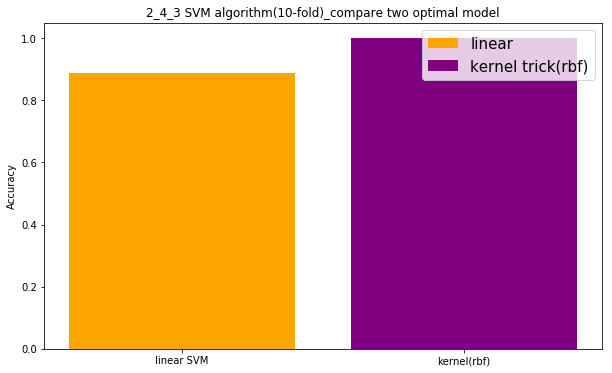


10-fold으로 test 한 경우
SVM linear로 훈련시킨 최적의 C값 :{'C': 0.01}
SVM kernel(rbf)로 훈련시킨 최적의 C,gamma 값 :{'C': 1.0, 'gamma': 0.01}

10-fold에서 찾은 최적의 c,gamma값으로 훈련시킨 모델의 test accuracy
SVM linear으로 훈련시킨 경우의 test accuracy :0.8888888888888888
SVM kernel(rbf)로  훈련시킨 경우의 test accuracy :1.0


In [35]:
#4.SVM
#표준화된 x이용
hyperparameter_C = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
hyperparameter_Gamma = [0.001,0.01,0.1,1]

scores_valid_SVM1=[]
scores_valid_SVM2=[]
best_acc_lin = 0

   
#gridSearch로 linear SVM ,cross validation
from sklearn.model_selection import GridSearchCV
param_grid = {'C': hyperparameter_C}
grid_svm_lin = GridSearchCV(SVC(kernel = 'linear'),param_grid, cv= kfold, return_train_score=True)
grid_svm_lin.fit(x_train1,y_train)
best_para_lin = grid_svm_lin.best_params_
best_acc_lin = grid_svm_lin.best_score_

#cross-validation 파라미터 별 accuracy결과
import pandas as pd
print("2_4_1 SVM(kernel='linear') 실행 시 Data")
pd.set_option('display.max_columns',None)
data = pd.DataFrame()
data['param_grid_C']=grid_svm_lin.cv_results_['param_C']
data['mean_test_accuracy']=grid_svm_lin.cv_results_['mean_test_score']
display(data)

    
#SVM_nonlinear
#gridSearch로 kernel = 'rbf'훈련
from sklearn.model_selection import GridSearchCV
param_grid2 = {'C': hyperparameter_C, 'gamma' : hyperparameter_Gamma}
grid_svm = GridSearchCV(SVC(kernel = 'rbf'),param_grid2, cv= kfold, return_train_score=True)
grid_svm.fit(x_train1,y_train)
best_para_ker = grid_svm.best_params_
best_acc_ker = grid_svm.best_score_

#cross-validation 파라미터 별 accuracy결과
import pandas as pd
print("2_4_2 SVM(kernel='rbf') 실행 시 Data")
pd.set_option('display.max_columns',None)
data2 = pd.DataFrame()
data2['param_grid_gamma']=grid_svm.cv_results_['param_gamma']
data2['param_grid_C']=grid_svm.cv_results_['param_C']
data2['mean_test_accuracy']=grid_svm.cv_results_['mean_test_score']
display(data2)



#validation accuracy 무엇이 더 좋은지
print('\n10-fold에서 찾은 cross-validation accuracy')
print('linear SVM으로 훈련시킨 경우의 cross-validationaccuracy :'+ str(best_acc_lin))
print('(kernel=rbf) SVM 으로  훈련시킨 경우의 cross-validation accuracy :' + str(best_acc_ker))

#linear SVM과 kernel trick='rbf'의  높은 cross-validation accuracy를 가진 최적화한 모델의 test accuracy비교
#linear
svm_linear_result=SVC(kernel='linear', **best_para_lin)
svm_linear_result.fit(x_train1,y_train)
scores_test_SVM_lin = svm_linear_result.score(x_test1,y_test)

#kernel='rbf'
svm_kernel_result=SVC(kernel='rbf',**best_para_ker)
svm_kernel_result.fit(x_train1,y_train)
scores_test_ker = svm_kernel_result.score(x_test1,y_test)

label_result = ['linear','kernel trick(rbf)']
tempData = {'linear':scores_test_SVM_lin ,'kernel trick(rbf)':scores_test_ker}
fig, ax = plt.subplots(figsize = (10,6))

x=[0,1]

for i, label in enumerate(label_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xticks(x,('linear SVM','kernel(rbf)'))
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_4_3 SVM algorithm(10-fold)_compare two optimal model')
plt.show()

print('\n10-fold으로 test 한 경우')
print('SVM linear로 훈련시킨 최적의 C값 :'+ str(best_para_lin))
print('SVM kernel(rbf)로 훈련시킨 최적의 C,gamma 값 :'+ str(best_para_ker))

print('\n10-fold에서 찾은 최적의 c,gamma값으로 훈련시킨 모델의 test accuracy')
print('SVM linear으로 훈련시킨 경우의 test accuracy :'+ str(scores_test_SVM_lin))
print('SVM kernel(rbf)로  훈련시킨 경우의 test accuracy :'+ str(scores_test_ker))

#추후의 모델 성능 비교를 위함
y=[scores_test_SVM_lin,scores_test_ker]
maxSVM = max(y)


Text(0.5,1,'10-fold each optimal models')

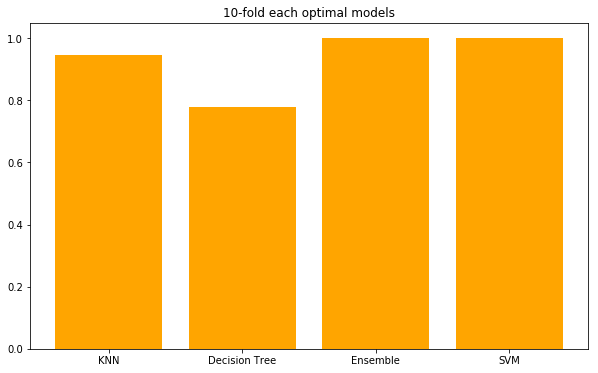

In [36]:
#graph로 전체 모델 성능 비교
x = [0,1,2,3]
plt.figure(figsize=(10,6))
y = [maxKnn,maxTree,maxEns,maxSVM]
plt.bar(x,y, color='orange')
plt.xticks(x,('KNN','Decision Tree','Ensemble','SVM'))
plt.title("10-fold each optimal models")

# 2. loocv

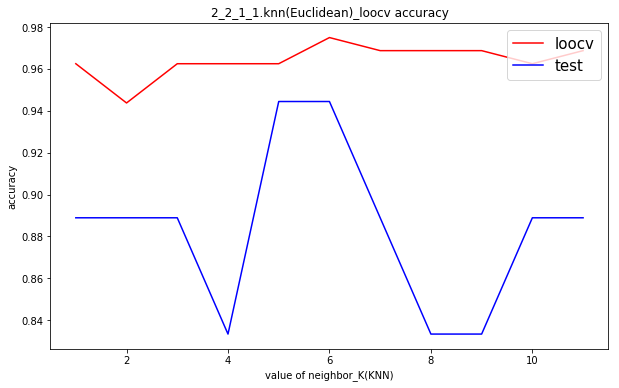

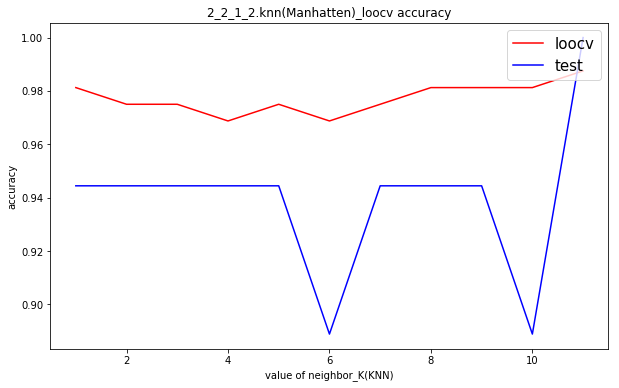


loocv에서 찾은 cross-validation accuracy
Euclidean으로 훈련시킨 경우의 cross-validation accuracy :0.975
Manhattan으로 훈련시킨 경우의 cross-validation accuracy :0.9875


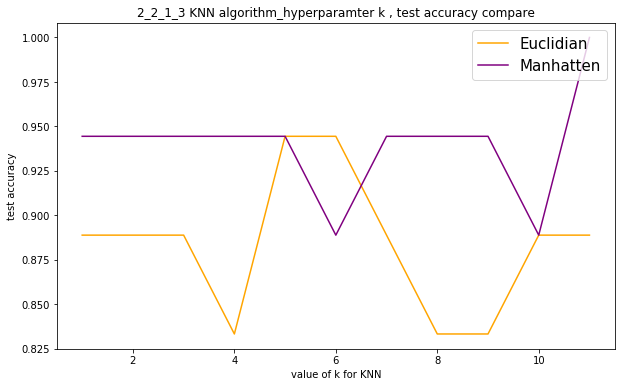


10-fold에서 찾은 cross-validation accuracy
gini criterion으로 훈련시킨 경우의 cross-validation accuracy :0.975
entropy criterion으로 훈련시킨 경우의 cross-validation accuracy :0.9875


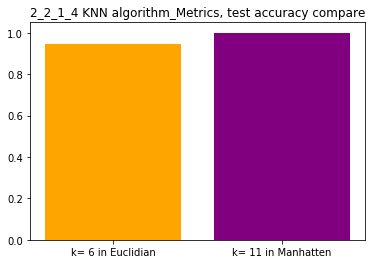


loocv로 test 한 경우
Euclidian 으로 거리를 잰 경우의 최적의 k값 :6
Manhattan 으로 거리를 잰 경우의 최적의 k값 :11

loocv에서 찾은 최적의 k값으로 훈련시킨 모델의 test accuracy
Euclidian 으로 거리를 잰 경우의 test accuracy :0.9444444444444444
Manhattan 으로 거리를 잰 경우의 test accuracy :1.0

test set으로 test 한 경우
Euclidian 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :5
Manhattan 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :11


In [26]:
#2.loocv -> kfold와 유사하다 
#cross validation에서 (cross_val_score의) cv값 외에 많이 유사하다.
#knn
#표준화된 x사용
scores_valid_knn1=[]
scores_valid_knn2=[]
loocv= LeaveOneOut()

hyperparameterK = range(1,12)

#각각 training set으로 cross validation 실행
for k in hyperparameterK :
    knn1 = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski',n_jobs=-1)
    scores1 = cross_val_score(knn1, x_train1,y_train, cv=loocv)
    scores_valid_knn1.append(np.mean(scores1))
    
    knn2 = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski',n_jobs=-1)
    scores2 = cross_val_score(knn2, x_train1,y_train, cv=loocv)
    scores_valid_knn2.append(np.mean(scores2))    


#loocv에서 가장 높았던 accuracy를 기록한 K값 저장(1부터 시작하므로 +1)
maxEuc = scores_valid_knn1.index(max(scores_valid_knn1))+1
maxMan = scores_valid_knn2.index(max(scores_valid_knn2))+1


#Euclidean 거리측정 방법 이용 후 cross validation결과 출력 
#scores_test_knnA는 앞에서 구한, k값에 따른 test acc변화
labels5=['loocv','test'] 
colors = ['red','blue']

tempData = {'loocv': scores_valid_knn1,'test':scores_test_knnA}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels5) :
    ax.plot(hyperparameterK, tempData[label], color = colors[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of neighbor_K(KNN)')
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_1_1.knn(Euclidean)_loocv accuracy')
plt.show() 

#Manhatten거리측정 방법 이용 후 cross validation결과 출력  
#scores_test_knnB는 앞에서 구한, k값에 따른 test acc변화
tempData = {'loocv': scores_valid_knn2,'test':scores_test_knnB}
fig,ax = plt.subplots(figsize=(10,6))

for i, label in enumerate(labels5) :
    ax.plot(hyperparameterK, tempData[label], color = colors[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of neighbor_K(KNN)')
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_1_2.knn(Manhatten)_loocv accuracy')
plt.show()

print('\nloocv에서 찾은 cross-validation accuracy')
print('Euclidean으로 훈련시킨 경우의 cross-validation accuracy :'+ str(max(scores_valid_knn1)))
print('Manhattan으로 훈련시킨 경우의 cross-validation accuracy :'+ str(max(scores_valid_knn2)))


#유클리드 메트릭과 맨허튼 메트릭의 k에 따른 최적화 시킨 모델 test acc 비교
labels_result = ['Euclidian','Manhatten']  
colors_result = ['orange','purple']
tempData = {'Euclidian':scores_test_knnA,'Manhatten':scores_test_knnB}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels_result) :
    ax.plot(hyperparameter_K,tempData[label], color = colors_result[i],label = label)       

plt.legend(loc="upper right", fontsize=15)
plt.xlabel('value of k for KNN')
plt.ylabel('test accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_1_3 KNN algorithm_hyperparamter k , test accuracy compare')
plt.show()

print('\n10-fold에서 찾은 cross-validation accuracy')
print('gini criterion으로 훈련시킨 경우의 cross-validation accuracy :'+ str(max(scores_valid_knn1)))
print('entropy criterion으로 훈련시킨 경우의 cross-validation accuracy :'+ str(max(scores_valid_knn2)))

#cross-validation 을 테스트하였을 때 , 가장 좋았던 최적의 파라미터로 모델학습시키기
#euclidean,Manhattan의 test acc 비교
knnEuc = KNeighborsClassifier(n_neighbors=maxEuc,p=2,metric='minkowski',n_jobs=-1)
knnEuc.fit(x_train1,y_train)
knnMan = KNeighborsClassifier(n_neighbors=maxMan,p=1,metric='minkowski',n_jobs=-1)
knnMan.fit(x_train1,y_train)

knnEuc_score = knnEuc.score(x_test1,y_test)
knnMan_score = knnMan.score(x_test1,y_test)

x = [0,1]
y = [maxEuc,maxMan]

fig,ax = plt.subplots()
tempData = {'Euclidian':knnEuc_score,'Manhatten':knnMan_score}

for i, label in enumerate(labels_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)

plt.xticks(x,('k= '+ str(y[0])+' in Euclidian','k= '+str(y[1])+' in Manhatten'))
plt.title("2_2_1_4 KNN algorithm_Metrics, test accuracy compare")
plt.show()

print('\nloocv로 test 한 경우')
print('Euclidian 으로 거리를 잰 경우의 최적의 k값 :'+ str(y[0]))
print('Manhattan 으로 거리를 잰 경우의 최적의 k값 :'+ str(y[1]))

print('\nloocv에서 찾은 최적의 k값으로 훈련시킨 모델의 test accuracy')
print('Euclidian 으로 거리를 잰 경우의 test accuracy :'+ str(knnEuc_score))
print('Manhattan 으로 거리를 잰 경우의 test accuracy :'+ str(knnMan_score))

print('\ntest set으로 test 한 경우')
print('Euclidian 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :'+ str(maxEuc_test))
print('Manhattan 으로 거리를 잰 경우의 정확도가 가장 높은 k값 :'+ str(maxMan_test))

#모델성능 비교를 위함
y=[knnEuc_score,knnMan_score]
maxKnn = max(y)

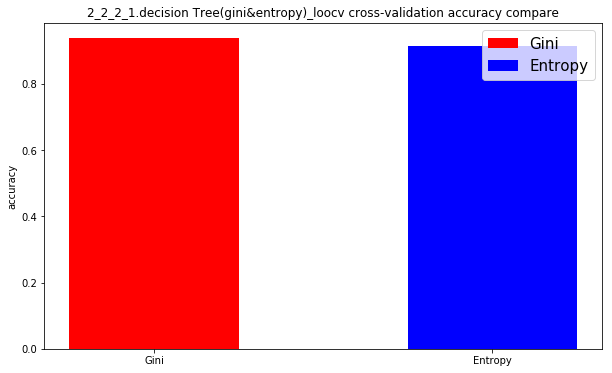


loocv에서 찾은 cross-validation accuracy
gini criterion으로 훈련시킨 경우의 cross-validation accuracy :0.9375
entropy criterion으로 훈련시킨 경우의 cross-validation accuracy :0.9125


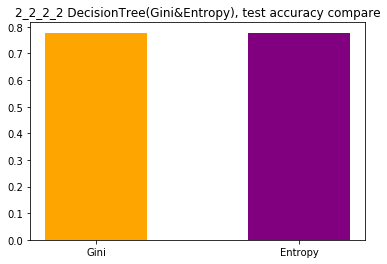


test set으로 test 한 경우
gini criterion으로 훈련시킨 경우의 test accuracy:0.7777777777777778
entropy criterion으로 훈련시킨 경우의 test accuracy :0.7777777777777778


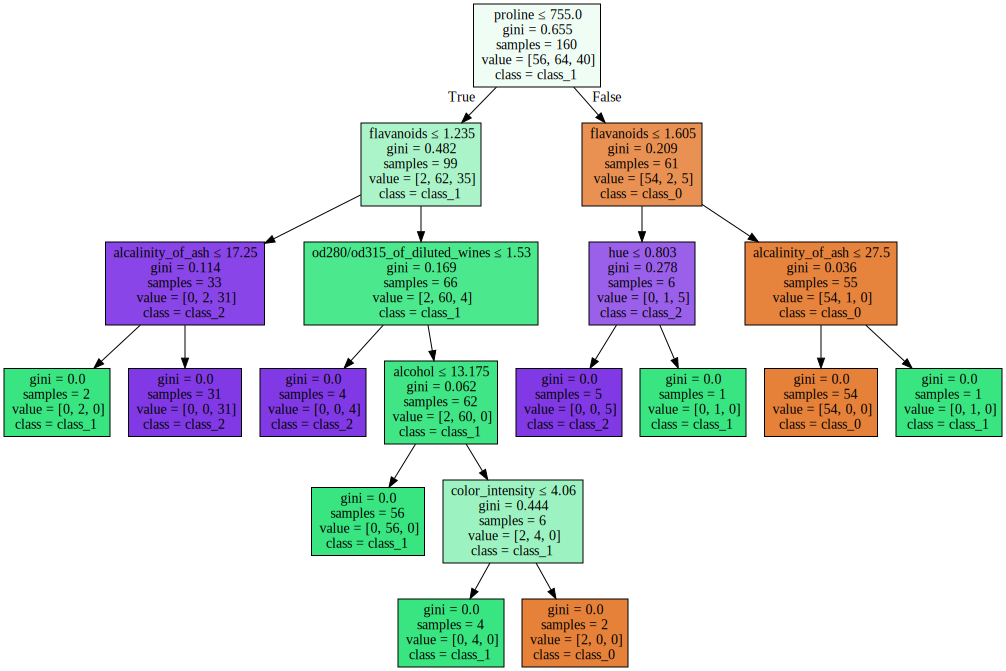

In [27]:
#2.decision tree
scores_valid_treeA=0
scores_valid_treeB=0


#gini,entropy를 적용하였을 때, 각각 cross-validation 값 저장
treeCross = DecisionTreeClassifier(criterion='gini',random_state=100)
scores = cross_val_score(treeCross, x_train,y_train, cv=loocv)
scores_valid_treeA = np.mean(scores)

treeCross2 = DecisionTreeClassifier(criterion='entropy',random_state=100)
scores2 = cross_val_score(treeCross2, x_train,y_train, cv=loocv)
scores_valid_treeB=np.mean(scores2)


#gini출력와 entorpy의 cross validation 값 출력
y=[scores_valid_treeA,scores_valid_treeB]
barWidth = 0.5
r1=np.arange(len(y))
labels5=['Gini','Entropy'] 
colors = ['red','blue']

#scores_test_gini는 1번에서 구한 leaf node에 따른 전체적인 test acc이다.
tempData = {'Gini': scores_valid_treeA,'Entropy':scores_valid_treeB}
fig, ax = plt.subplots(figsize = (10,6) )

for i, label in enumerate(labels5) :
    ax.bar(r1[i],tempData[label],width = barWidth, color = colors[i],label = label)

plt.xticks(r1,(labels5[0],labels5[1]))
plt.ylabel('accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_2_1.decision Tree(gini&entropy)_loocv cross-validation accuracy compare')
plt.show()    
    
print('\nloocv에서 찾은 cross-validation accuracy')
print('gini criterion으로 훈련시킨 경우의 cross-validation accuracy :'+ str(scores_valid_treeA))
print('entropy criterion으로 훈련시킨 경우의 cross-validation accuracy :'+ str(scores_valid_treeB))



#gini 와 entropy의 test acc비교하기
#Gini로 training된 tree
treeGini = DecisionTreeClassifier(criterion='gini', random_state=100)
treeGini = treeGini.fit(x_train,y_train)
treeGini_score = treeGini.score(x_test,y_test)

#entropy로 training된 tree
treeEntro = DecisionTreeClassifier(criterion='entropy',random_state=100)
treeEntro = treeEntro.fit(x_train,y_train)
treeEntro_score = treeEntro.score(x_test,y_test)

y = [treeGini_score,treeEntro_score]
r1=np.arange(len(y))
fig,ax = plt.subplots()
tempData = {'Gini':treeGini_score ,'Entropy':treeEntro_score}

for i, label in enumerate(labels5) :
    ax.bar(r1[i],tempData[label], width = barWidth,color = colors_result[i],label = label)

plt.xticks(r1,(labels5[0],labels5[1]))
plt.title("2_2_2_2 DecisionTree(Gini&Entropy), test accuracy compare")
plt.show()


print('\ntest set으로 test 한 경우')
print('gini criterion으로 훈련시킨 경우의 test accuracy:'+ str(treeGini_score))
print('entropy criterion으로 훈련시킨 경우의 test accuracy :'+ str(treeEntro_score))

#추후의 모델 비교를 위함
maxTree = max(y)


#tree 출력
#validation set에서 찾은 최적의 파라미터로 그린 tree
if scores_valid_treeA>scores_valid_treeB :
    dot_data = tree.export_graphviz(treeGini, out_file=None,
                               feature_names = wine.feature_names,
                               class_names = wine.target_names,
                               filled=True, 
                               special_characters=True)
else:
    dot_data = tree.export_graphviz(treeEntro, out_file=None,
                               feature_names = wine.feature_names,
                               class_names = wine.target_names,
                               filled=True, 
                               special_characters=True)    
graph = graphviz.Source(dot_data)
graph


# Tuning hyper-parameters _randomForest_for accuracy

2_2_3_1 randomForest loocv Data


,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf,accuracy
0,1,6,4,3,1,0.88125
1,10,6,4,3,1,0.98125
2,50,6,4,3,1,0.97500
3,100,6,4,3,1,0.97500
4,150,6,4,3,1,0.97500
5,1,6,4,5,1,0.91250
6,10,6,4,5,1,0.98125
7,50,6,4,5,1,0.96875
8,100,6,4,5,1,0.97500
9,150,6,4,5,1,0.97500


# Tuning hyper-parameters _bagging_for accuracy

2_2_3_2 Bagging loocv Data


,n_estimators,max_samples,max_features,accuracy
0,1,0.1,0.1,0.64375
1,10,0.1,0.1,0.80625
2,50,0.1,0.1,0.90625
3,100,0.1,0.1,0.97500
4,150,0.1,0.1,0.94375
5,1,0.5,0.1,0.63750
6,10,0.5,0.1,0.81875
7,50,0.5,0.1,0.90625
8,100,0.5,0.1,0.93750
9,150,0.5,0.1,0.93125



loocv에서 찾은 cross-validation accuracy
random forest으로 훈련시킨 경우의 cross-validation accuracy :0.9375
bagging으로 훈련시킨 경우의 cross-validation accuracy :0.9125


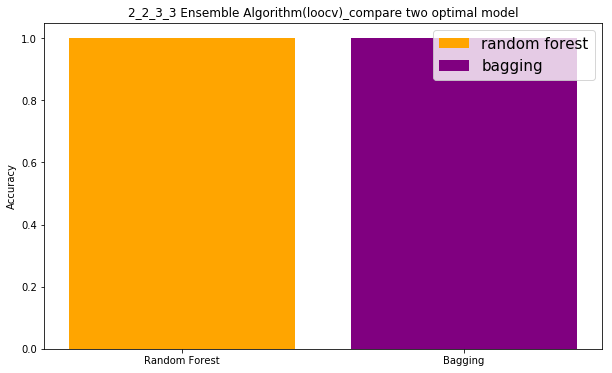


loocv으로 test 한 경우
randomForest으로 훈련시킨 최적의 parameter값
{'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
Bagging 으로 훈련시킨 최적의 parameter값 
{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 50}

loocv에서 찾은 최적의 parameter값으로 훈련시킨 모델의 test accuracy
randomForest으로 훈련시킨 경우의 test accuracy :1.0
Bagging 으로  훈련시킨 경우의 test accuracy :1.0


In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import math
feature = wine.data.shape[1]
max_features = [round(feature/2),'sqrt',feature]
n_estimators= [1,10,50,100,150]
max_depth = [4,7,11]
min_samples_split = [3,5,10]
min_samples_leaf = [1, 2, 4]

rf_param_grid = {
             'n_estimators' : n_estimators,
             'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
    }


#train set 90%개로 random forest훈련시킴(매우 오래걸림)
print("# Tuning hyper-parameters _randomForest_for accuracy\n")
grid_randomForest =GridSearchCV(estimator = RandomForestClassifier(random_state=100),param_grid= rf_param_grid, cv=loocv, n_jobs = -1,return_train_score=True)
grid_randomForest.fit(x_train, y_train)

#훈련 결과 파라미터에 따른 accuracy 출력
print("2_2_3_1 randomForest loocv Data")
import pandas as pd
pd.set_option('display.max_columns',None)
data = pd.DataFrame()
data['n_estimators']=grid_randomForest.cv_results_['param_n_estimators']
data['max_features']=grid_randomForest.cv_results_['param_max_features']
data['max_depth']=grid_randomForest.cv_results_['param_max_depth']
data['min_samples_split']=grid_randomForest.cv_results_['param_min_samples_split']
data['min_samples_leaf']=grid_randomForest.cv_results_['param_min_samples_leaf']
data['accuracy']=grid_randomForest.cv_results_['mean_test_score']
display(data)



#bagging
max_samples = [0.1,0.5,1.0]
max_fea = [0.1,0.5,1.0]
bag_param_grid = {
    'n_estimators' : n_estimators,
    'max_samples': max_samples,
    'max_features': max_fea
}
print("# Tuning hyper-parameters _bagging_for accuracy\n")
grid_bag = GridSearchCV(estimator = BaggingClassifier(random_state=100),param_grid= bag_param_grid, cv=loocv)
grid_bag.fit(x_train, y_train)

#훈련 결과 파라미터에 따른 accuracy출력
print("2_2_3_2 Bagging loocv Data")
data2 = pd.DataFrame()
data2['n_estimators']=grid_bag.cv_results_['param_n_estimators']
data2['max_samples']=grid_bag.cv_results_['param_max_samples']
data2['max_features']=grid_bag.cv_results_['param_max_features']
data2['accuracy']=grid_bag.cv_results_['mean_test_score']
display(data2)



print('\nloocv에서 찾은 cross-validation accuracy')
print('random forest으로 훈련시킨 경우의 cross-validation accuracy :'+ str(scores_valid_treeA))
print('bagging으로 훈련시킨 경우의 cross-validation accuracy :'+ str(scores_valid_treeB))

#최종 test accuracy비교
#randomforest 최적의 파라미터 값으로 훈련
best_para_rf = grid_randomForest.best_params_
best_acc_rf = grid_randomForest.best_score_
randomForest_result = RandomForestClassifier(**best_para_rf,random_state=100)
randomForest_result.fit(x_train,y_train)
scores_rf = randomForest_result.score(x_test,y_test)

#bagging 최적의 파라미터  값으로 훈련
best_para_bag = grid_bag.best_params_
best_acc_bag = grid_bag.best_score_
bag_result = BaggingClassifier(**best_para_bag,random_state=100)
bag_result.fit(x_train,y_train)
scores_bag = bag_result.score(x_test,y_test)


label_result = ['random forest','bagging']
tempData = {'random forest':scores_rf ,'bagging':scores_bag}
fig, ax = plt.subplots(figsize = (10,6))

x=[0,1]

for i, label in enumerate(label_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xticks(x,('Random Forest','Bagging'))
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_3_3 Ensemble Algorithm(loocv)_compare two optimal model')
plt.show()

print('\nloocv으로 test 한 경우')
print('randomForest으로 훈련시킨 최적의 parameter값\n'+ str(best_para_rf))
print('Bagging 으로 훈련시킨 최적의 parameter값 \n'+ str(best_para_bag))

print('\nloocv에서 찾은 최적의 parameter값으로 훈련시킨 모델의 test accuracy')
print('randomForest으로 훈련시킨 경우의 test accuracy :'+ str(scores_rf))
print('Bagging 으로  훈련시킨 경우의 test accuracy :'+ str(scores_bag))

#모델성능 비교를 위함
y=[scores_rf,scores_bag]
maxEns = max(y)

2_2_4_1 SVM(kernel='linear') 실행 시 Data


,param_grid_C,mean_test_accuracy
0,0.0001,0.40000
1,0.001,0.46875
2,0.01,0.98750
3,0.1,0.98750
4,1,0.98750
5,10,0.98750
6,100,0.98750
7,1000,0.98750


2_2_4_2 SVM(kernel='rbf') 실행 시 Data


,param_grid_gamma,param_grid_C,mean_test_accuracy
0,0.001,0.0001,0.40000
1,0.01,0.0001,0.40000
2,0.1,0.0001,0.40000
3,1,0.0001,0.40000
4,0.001,0.001,0.40000
5,0.01,0.001,0.40000
6,0.1,0.001,0.40000
7,1,0.001,0.40000
8,0.001,0.01,0.40000
9,0.01,0.01,0.40000



loocv에서 찾은 cross-validation accuracy
linear SVM으로 훈련시킨 경우의 cross-validationaccuracy :0.9875
(kernel=rbf) SVM 으로  훈련시킨 경우의 cross-validation accuracy :0.9875


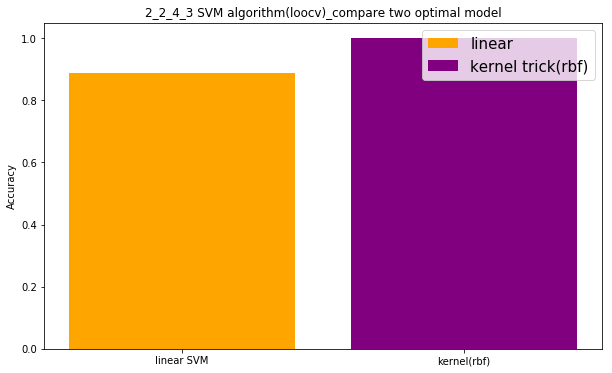


loocv으로 test 한 경우
SVM linear로 훈련시킨 최적의 C값 :{'C': 0.01}
SVM kernel(rbf)로 훈련시킨 최적의 C,gamma 값 :{'C': 1.0, 'gamma': 0.01}

loocv에서 찾은 최적의 c,gamma값으로 훈련시킨 모델의 test accuracy
SVM linear으로 훈련시킨 경우의 test accuracy :0.8888888888888888
SVM kernel(rbf)로  훈련시킨 경우의 test accuracy :1.0


In [29]:
#4.SVM
#표준화된 x사용
hyperparameter_C = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
hyperparameter_Gamma = [0.001,0.01,0.1,1]

scores_valid_SVM1=[]
scores_valid_SVM2=[]
best_acc_lin = 0

   
#linear_SVM gridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {'C': hyperparameter_C}
grid_svm_lin = GridSearchCV(SVC(kernel = 'linear'),param_grid, cv= loocv, return_train_score=True)
grid_svm_lin.fit(x_train1,y_train)
best_para_lin = grid_svm_lin.best_params_
best_acc_lin = grid_svm_lin.best_score_

#grid Search 에서 C에 따른 변화량 출력
import pandas as pd
print("2_2_4_1 SVM(kernel='linear') 실행 시 Data")
pd.set_option('display.max_columns',None)
data = pd.DataFrame()
data['param_grid_C']=grid_svm_lin.cv_results_['param_C']
data['mean_test_accuracy']=grid_svm_lin.cv_results_['mean_test_score']
display(data)
    
#SVM_nonlinear
#kernel = 'rbf' grid Search
from sklearn.model_selection import GridSearchCV
param_grid2 = {'C': hyperparameter_C, 'gamma' : hyperparameter_Gamma}
grid_svm = GridSearchCV(SVC(kernel = 'rbf'),param_grid2, cv= loocv, return_train_score=True)
grid_svm.fit(x_train1,y_train)
best_para_ker = grid_svm.best_params_
best_acc_ker = grid_svm.best_score_

#grid search에서 C,gamma에 따른 변화량 출력
import pandas as pd
print("2_2_4_2 SVM(kernel='rbf') 실행 시 Data")
pd.set_option('display.max_columns',None)
data2 = pd.DataFrame()
data2['param_grid_gamma']=grid_svm.cv_results_['param_gamma']
data2['param_grid_C']=grid_svm.cv_results_['param_C']
data2['mean_test_accuracy']=grid_svm.cv_results_['mean_test_score']
display(data2)


#validation accuracy 무엇이 더 좋은지
print('\nloocv에서 찾은 cross-validation accuracy')
print('linear SVM으로 훈련시킨 경우의 cross-validationaccuracy :'+ str(best_acc_lin))
print('(kernel=rbf) SVM 으로  훈련시킨 경우의 cross-validation accuracy :' + str(best_acc_ker))
#linear SVM과 kernel trick='rbf'의  최적화된 파라미터로 훈련된 Model의 test accuracy비교
#linear
svm_linear_result=SVC(kernel='linear', **best_para_lin)
svm_linear_result.fit(x_train1,y_train)
scores_test_SVM_lin = svm_linear_result.score(x_test1,y_test)

#kernel='rbf'
svm_kernel_result=SVC(kernel='rbf',**best_para_ker)
svm_kernel_result.fit(x_train1,y_train)
scores_test_ker = svm_kernel_result.score(x_test1,y_test)

label_result = ['linear','kernel trick(rbf)']
tempData = {'linear':scores_test_SVM_lin ,'kernel trick(rbf)':scores_test_ker}
fig, ax = plt.subplots(figsize = (10,6))

x=[0,1]

for i, label in enumerate(label_result) :
    ax.bar(x[i],tempData[label], color = colors_result[i],label = label)
    
plt.legend(loc="upper right", fontsize=15)
plt.xticks(x,('linear SVM','kernel(rbf)'))
plt.ylabel('Accuracy')
plt.legend(loc="upper right", fontsize=15)
plt.title('2_2_4_3 SVM algorithm(loocv)_compare two optimal model')
plt.show()

print('\nloocv으로 test 한 경우')
print('SVM linear로 훈련시킨 최적의 C값 :'+ str(best_para_lin))
print('SVM kernel(rbf)로 훈련시킨 최적의 C,gamma 값 :'+ str(best_para_ker))

print('\nloocv에서 찾은 최적의 c,gamma값으로 훈련시킨 모델의 test accuracy')
print('SVM linear으로 훈련시킨 경우의 test accuracy :'+ str(scores_test_SVM_lin))
print('SVM kernel(rbf)로  훈련시킨 경우의 test accuracy :'+ str(scores_test_ker))

#모델성능 비교를 위함
y=[scores_test_SVM_lin,scores_test_ker]
maxSVM = max(y)


Text(0.5,1,'loocv each optimal models')

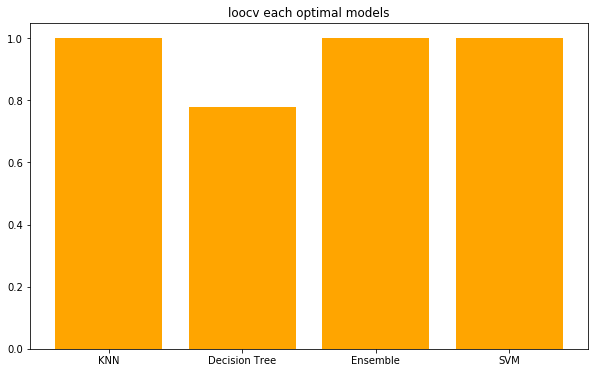

In [30]:
#graph로 loocv사용 시 모델들의 acc비교
x = [0,1,2,3]
plt.figure(figsize=(10,6))
y = [maxKnn,maxTree,maxEns,maxSVM]
plt.bar(x,y, color='orange')
plt.xticks(x,('KNN','Decision Tree','Ensemble','SVM'))
plt.title("loocv each optimal models")